In [3]:
import seaborn as sns

In [4]:
from numpy.random import binomial

### Binomial 이항분포

In [5]:
x = binomial(10, .5, 100)
x

array([1, 6, 7, 5, 3, 5, 5, 7, 2, 5, 4, 6, 6, 2, 4, 3, 3, 7, 6, 5, 4, 5,
       5, 5, 7, 7, 1, 7, 7, 5, 3, 4, 5, 5, 5, 9, 4, 4, 4, 4, 5, 5, 6, 3,
       7, 5, 5, 6, 3, 4, 5, 5, 6, 7, 3, 5, 5, 7, 5, 6, 8, 3, 4, 6, 6, 4,
       5, 4, 6, 3, 5, 1, 8, 7, 4, 5, 4, 7, 3, 4, 7, 6, 9, 8, 5, 4, 5, 4,
       5, 5, 7, 5, 5, 2, 2, 4, 6, 5, 4, 3])

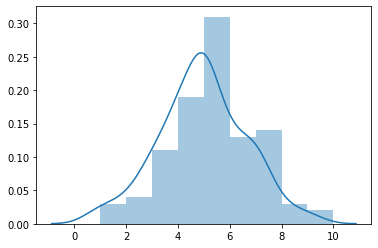

In [6]:
sns.distplot(x, bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# 실습
각 아래 분포로 데이터를 만들어서 sns.distplot 출력

### 이산
- 기하분포
- 음이항분포
- 포아송분포

### 연속
- 균등분포
- 정규분포
- 지수분포

In [7]:
import numpy as np

In [8]:
from numpy.random import geometric

In [9]:
from numpy.random import negative_binomial, poisson

In [10]:
from numpy.random import uniform, normal, exponential

### Geometric 기하분포

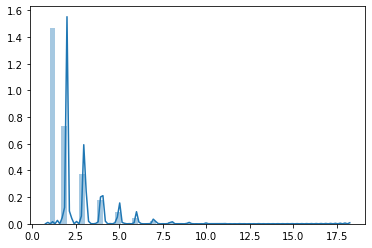

In [11]:
sns.distplot(geometric(.5, 100000))

### Negative Binomial 음이항분포

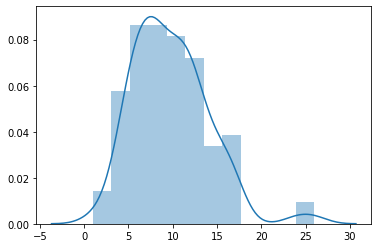

In [12]:
sns.distplot(negative_binomial(10, .5, 100))

### Poisson 포아송분포

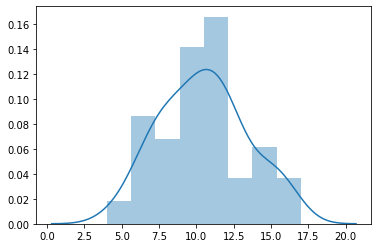

In [13]:
sns.distplot(poisson(10, 100))

### Uniform 균등분포

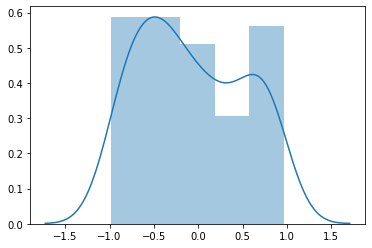

In [14]:
# min -1
# max 1
sns.distplot(uniform(-1, 1, 100))

### normal 정규분포

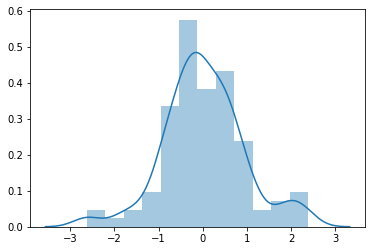

In [15]:
# 원점=평균 0 
# Scale 1
sns.distplot(normal(0, 1, 100))

### Exponential 지수분포

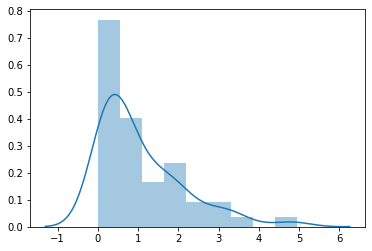

In [16]:
sns.distplot(exponential(1, 100))

# Parameter 모수: 설정값

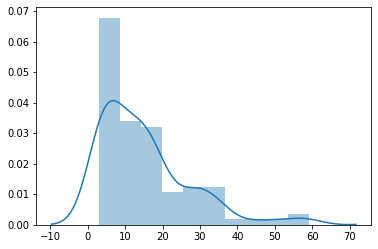

In [17]:
개판 = []
for i in range(100):
    한계 = 3
    옐로카드 = 0
    짜증확률 = .5
    기간 = 0
    while 옐로카드 < 한계:
        짜증 = binomial(1, 짜증확률)
        if 짜증 == 1:
            옐로카드 += 1
        else:
            옐로카드 = 0
        기간 += 1
    기간
    개판.append(기간)

sns.distplot(개판)

# 요약
- 확률분포: 데이터를 만드는 방법 ex. Recipe
- Parameter: 분포의 성격을 결정하는 수치 ex. 설탕 1컵, 계란 1개
- 데이터: 분포에서 나온 것

# 확률

In [18]:
80/240
80/130


0.6153846153846154

### 독립
- 두 사건 A, B 가 독립이면 P(A | B) = P(A) 이고, P(B | A) = P(B)
- P(A, B) = P(A | B) * P(B) = P(A) * P(B)

# 그래프 모델
-> 데이터로 입증하기 위해 그래프 모델을 만든다

그래프 모델에서 서로 영향을 주고 받는 건(순환고리) 표시할 수 없다.
- 실제로 나눌 수 있음
> ex. 매출과 투자가 서로 영향을 주고 받는 것 같지만
>- 작년 매출이 올해 투자에 영향을 주고 올해의 투자가 내년의 매출에 영향을 준다.
>- (시점의 차이)

벤처 캐피탈

# 조건부독립
### B 가 주어졌을 때

(A) -> (B) -> (C) : A 는 몰라도 C 알 수 있다

P(A, C | B) = P(C | B) * P(B | A) * P(A) / P(B) = P(C | B) * P(A | B)

# 독립변수와 종속변수
- 연속변수 -> 연속변수
- 연속변수 -> 이산변수
- 이산변수 -> 연속변수
- 이산변수 -> 이산변수

# 선형 모형
- 복잡한 모형은 틀릴 가능성이 많다.
- 단순한 모형은 틀릴 가능성이 적다.

In [19]:
# 평균 50, 표준편차 15 인 배우 100명
연기력 = normal(50, 15, 100)

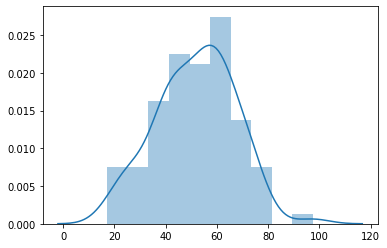

In [20]:
sns.distplot(연기력)

In [21]:
연기의영향 = 100 * 연기력 + 20000
매출 = normal(연기의영향, 800)

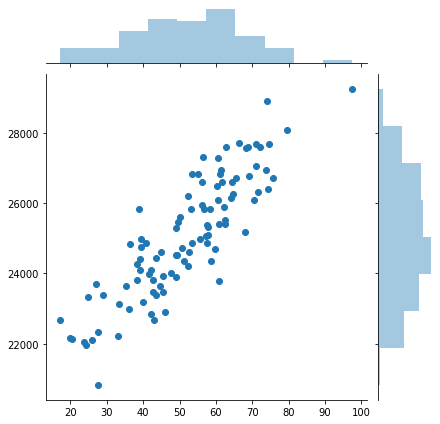

In [24]:
sns.jointplot(연기력, 매출)

In [25]:
연기의영향 = 100 * 연기력
매출 = normal(20000, 연기의영향)

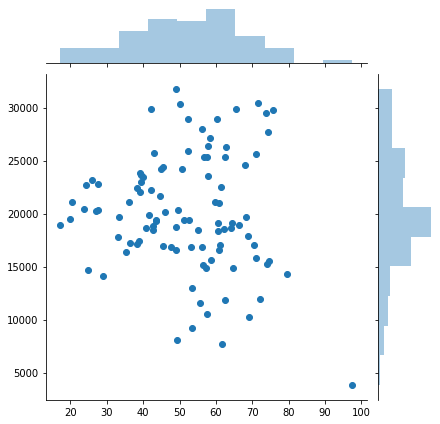

In [26]:
sns.jointplot(연기력, 매출)

# 로지스틱 선형 모형

- -oid:-를 닮은
- andr-oid: 사람을 닮은
- sigm-oid: 시그마(s자)를 닮은

In [30]:
from scipy.special import expit

In [31]:
expit(0)

0.5

In [32]:
expit(10)

0.9999546021312976

In [33]:
expit(-6)

0.0024726231566347743

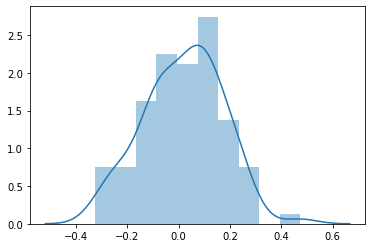

In [43]:
# 선형모형
연기의영향 = 0.01 * 연기력 - .5

sns.distplot(연기의영향)

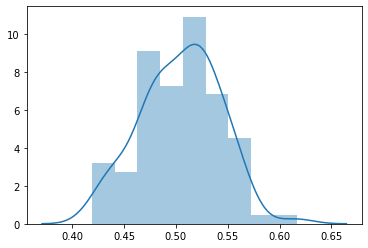

In [46]:
# 로지스틱 선형모형
# 0 ~ 1 사이로 바뀐다

expit(연기의영향)
sns.distplot(expit(연기의영향))

In [37]:
주연상 = binomial(5, expit(연기의영향))

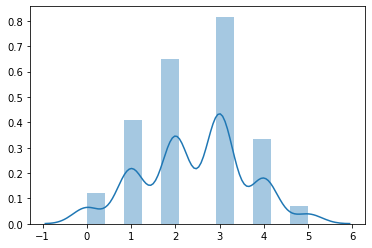

In [40]:
sns.distplot(주연상)

# 선형모형: 연속형 -> 이산형

In [51]:
실력 = normal(50, 15, 100)
실력의영향 = expit(0.5 * 실력 - 25)
합격 = binomial(1, 실력의영향)

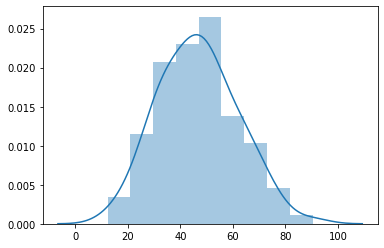

In [55]:
sns.distplot(실력)

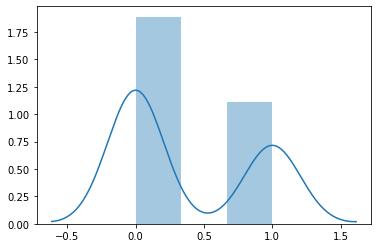

In [56]:
sns.distplot(합격)

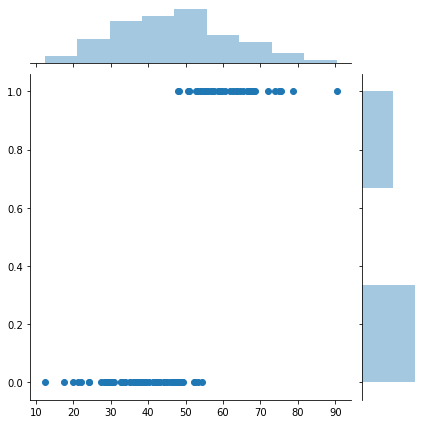

In [52]:
# 결과가 0 아니면 1 
sns.jointplot(실력, 합격)

# 선형모형: 이산형 -> 연속형

In [53]:
# 80 % 의 확률로 작동
# 100 대
공기청정기 = binomial(1, .8, 100)
청정기의영향 = 10 * 공기청정기 + 8
공기질 = normal(청정기의영향, 30)

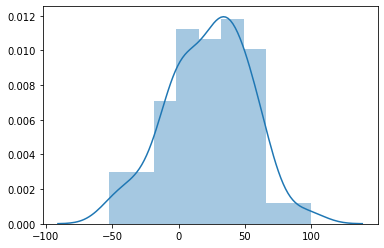

In [54]:
sns.distplot(공기질)

# 로지스틱 선형모형: 이산형 -> 이산형
연속변수가 이산변수에 영향을 줄 때 쓸 수 있는 테크닉

In [74]:
if 공기청정기 == 1:
    청정기의영향 = 0.73
else:
    청정기의영향 = 0.26

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

위와 같은 내용을 if 문 없이 로지스틱 선형모형으로 만들 수 있다

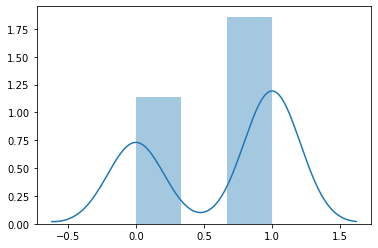

In [71]:
공기청정기 = binomial(1, .8, 100)
청정기의영향 = expit(2 * 공기청정기 -1)
알러지 = binomial(1, 청정기의영향)

sns.distplot(알러지)